In [1]:
!wget https://raw.githubusercontent.com/agoel00/SaferAPI/master/data/crime.csv?token=Amx6WiBHNDx3Kgo6DY-7yGhwFz8iDiQlks5cHkm3wA%3D%3D

--2018-12-15 14:56:36--  https://raw.githubusercontent.com/agoel00/SaferAPI/master/data/crime.csv?token=Amx6WiBHNDx3Kgo6DY-7yGhwFz8iDiQlks5cHkm3wA%3D%3D
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14747 (14K) [text/plain]
Saving to: ‘crime.csv?token=Amx6WiBHNDx3Kgo6DY-7yGhwFz8iDiQlks5cHkm3wA==.1’

crime.csv?token=Amx 100%[===================>]  14.40K  --.-KB/s    in 0.007s  

2018-12-15 14:56:36 (2.10 MB/s) - ‘crime.csv?token=Amx6WiBHNDx3Kgo6DY-7yGhwFz8iDiQlks5cHkm3wA==.1’ saved [14747/14747]



In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv("crime.csv")

In [4]:
data.head()

,nm_pol,murder,rape,gangrape,robbery,theft,assualt murders,sexual harassement,totarea,totalcrime,long,lat,crime/area,area
0,CHITRANJAN PARK,2,6,1,35,442,19,7,2659329.537,512,77.24920,28.53632,192.529731,2.659330
1,DABRI,8,28,0,79,240,26,16,3401013.428,397,77.08600,28.61268,116.729912,3.401013
2,MALVIYA NAGAR,3,28,1,33,694,63,15,1379853.572,837,77.20418,28.52989,606.586102,1.379854
3,CHANDNI MAHAL,1,8,1,23,529,19,7,5570696.132,588,77.23608,28.64361,105.552338,5.570696
4,MODEL TOWN,0,4,1,45,393,9,14,2689157.085,466,77.19369,28.70257,173.288501,2.689157


In [0]:
X = data.iloc[:, [1,2,3,4,5,6,7,12]].values

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [8]:
print(wcss)

[1328.0, 996.6151424286376, 871.9102681805609, 772.8054037447861, 711.2396067923485, 660.6275660059493, 619.0829548622826, 570.2878781509746, 546.6994595248077, 512.9764502206173, 494.2056732684565, 470.67133647403125, 453.85732035253477, 438.30057896030974, 430.52139291382707, 403.4562311134483, 393.37242984350127, 379.5808465826283, 376.77911713648433, 365.1175946122928]


In [0]:
import matplotlib.pyplot as plt

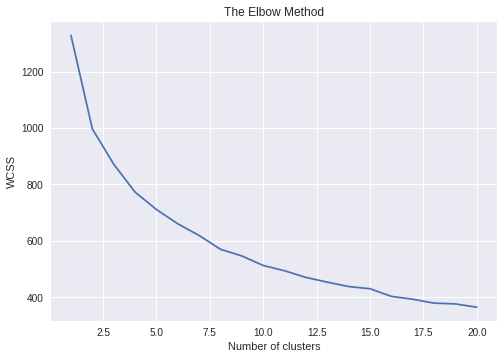

In [10]:
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 0 4 1 1 0 1 1 1 1 5 0 1 0 5 0 0 0 4 5 0 3 1 1 2 1 0 1 1 3 5 0 5 1 1 5 5
 1 5 1 3 5 1 3 0 5 0 0 1 5 1 0 1 1 3 3 0 3 3 3 1 5 5 3 5 3 1 5 0 1 2 1 4 3
 3 5 5 1 5 1 1 4 0 3 2 1 5 3 0 0 3 5 5 4 3 2 1 1 5 2 5 1 1 0 1 3 1 5 5 5 5
 5 1 2 5 5 1 3 1 0 5 3 2 5 1 2 4 1 5 3 4 3 4 1 1 3 1 1 1 1 1 3 2 5 5 0 1 3
 5 5 1 3 3 5 3 1 5 2 5 5 2 5 1 3 3 1]


In [0]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(X)

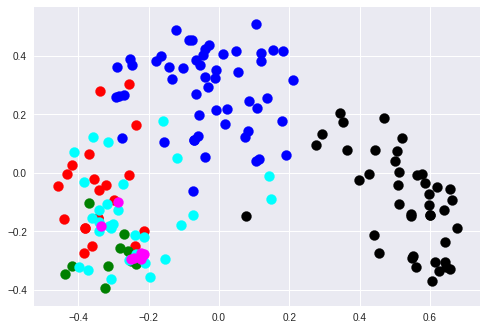

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta' )
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black' )

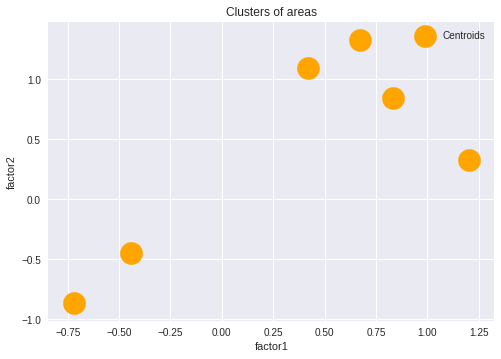

In [14]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 500, c = 'orange', label = 'Centroids')
plt.title('Clusters of areas')
plt.xlabel('factor1')
plt.ylabel('factor2')
plt.legend()
plt.show()

In [15]:
y_kmeans

array([1, 0, 4, 1, 1, 0, 1, 1, 1, 1, 5, 0, 1, 0, 5, 0, 0, 0, 4, 5, 0, 3,
       1, 1, 2, 1, 0, 1, 1, 3, 5, 0, 5, 1, 1, 5, 5, 1, 5, 1, 3, 5, 1, 3,
       0, 5, 0, 0, 1, 5, 1, 0, 1, 1, 3, 3, 0, 3, 3, 3, 1, 5, 5, 3, 5, 3,
       1, 5, 0, 1, 2, 1, 4, 3, 3, 5, 5, 1, 5, 1, 1, 4, 0, 3, 2, 1, 5, 3,
       0, 0, 3, 5, 5, 4, 3, 2, 1, 1, 5, 2, 5, 1, 1, 0, 1, 3, 1, 5, 5, 5,
       5, 5, 1, 2, 5, 5, 1, 3, 1, 0, 5, 3, 2, 5, 1, 2, 4, 1, 5, 3, 4, 3,
       4, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 5, 5, 0, 1, 3, 5, 5, 1, 3, 3, 5,
       3, 1, 5, 2, 5, 5, 2, 5, 1, 3, 3, 1], dtype=int32)

In [0]:
places = data.iloc[:,0].values

In [0]:
longitude = data.iloc[:, 10].values
latitude = data.iloc[:, 11].values

In [18]:
latitude

array([28.53632, 28.61268, 28.52989, 28.64361, 28.70257, 28.65335,
       28.66645, 28.53067, 28.6091 , 28.56234, 28.52299, 28.7072 ,
       28.72582, 28.66004, 28.59139, 28.71793, 28.57051, 28.70236,
       28.67441, 28.60369, 28.73664, 28.65284, 28.70984, 28.60337,
       28.62038, 28.67965, 28.46549, 28.64981, 28.63969, 28.73358,
       28.64295, 28.63089, 28.56934, 28.70024, 28.66879, 28.53321,
       28.54728, 28.64784, 28.58744, 28.63077, 28.52678, 28.72516,
       28.59572, 28.62657, 28.70965, 28.71003, 28.55914, 28.79903,
       28.72579, 28.53492, 28.74286, 28.79654, 28.72449, 28.63356,
       28.49893, 28.63505, 28.71681, 28.68423, 28.69784, 28.66539,
       28.63   , 28.59238, 28.6419 , 28.69664, 28.66676, 28.65557,
       28.70265, 28.6554 , 28.68851, 28.69245, 28.63896, 28.58809,
       28.66013, 28.60935, 28.64583, 28.65399, 28.57449, 28.60975,
       28.52958, 28.61363, 28.49385, 28.68901, 28.66917, 28.69251,
       28.63857, 28.59827, 28.56843, 28.66699, 28.60415, 28.65

In [0]:
results = []
   
for i in range(0, 166):
    longitude[i] = round(longitude[i], 4)
    latitude[i] = round(latitude[i], 4)

    response = {
            'danger_index': y_kmeans[i],
            'longitude': longitude[i], 
            'latitude': latitude[i]
        }
    results.append(response)

In [0]:
import pprint

In [21]:
pprint.pprint(results)

[{'danger_index': 1, 'latitude': 28.5363, 'longitude': 77.2492},
 {'danger_index': 0, 'latitude': 28.6127, 'longitude': 77.086},
 {'danger_index': 4, 'latitude': 28.5299, 'longitude': 77.2042},
 {'danger_index': 1, 'latitude': 28.6436, 'longitude': 77.2361},
 {'danger_index': 1, 'latitude': 28.7026, 'longitude': 77.1937},
 {'danger_index': 0, 'latitude': 28.6534, 'longitude': 77.2937},
 {'danger_index': 1, 'latitude': 28.6664, 'longitude': 77.2262},
 {'danger_index': 1, 'latitude': 28.5307, 'longitude': 77.2653},
 {'danger_index': 1, 'latitude': 28.6091, 'longitude': 77.0662},
 {'danger_index': 1, 'latitude': 28.5623, 'longitude': 77.2676},
 {'danger_index': 5, 'latitude': 28.523, 'longitude': 77.3062},
 {'danger_index': 0, 'latitude': 28.7072, 'longitude': 77.2242},
 {'danger_index': 1, 'latitude': 28.7258, 'longitude': 77.0036},
 {'danger_index': 0, 'latitude': 28.66, 'longitude': 77.1738},
 {'danger_index': 5, 'latitude': 28.5914, 'longitude': 77.0864},
 {'danger_index': 0, 'latitud

In [0]:
import joblib

In [24]:
joblib.dump(kmeans, "predicted_danger.pkl")

['predicted_danger.pkl']

In [0]:
from google.colab import files

In [0]:
files.download('predicted_danger.pkl')